In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
conn = sqlite3.connect("../db.sqlite3")
query = """
SELECT
    restaurant_order.id AS order_id,
    restaurant_order.datetime,
    restaurant_orderitem.id AS order_item_id,
    restaurant_orderitem.quantity,
    restaurant_orderitem.product_id,
    restaurant_product.price,
    restaurant_product.name
FROM
    restaurant_order
    INNER JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
    INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.to_csv("../restaurant_data.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

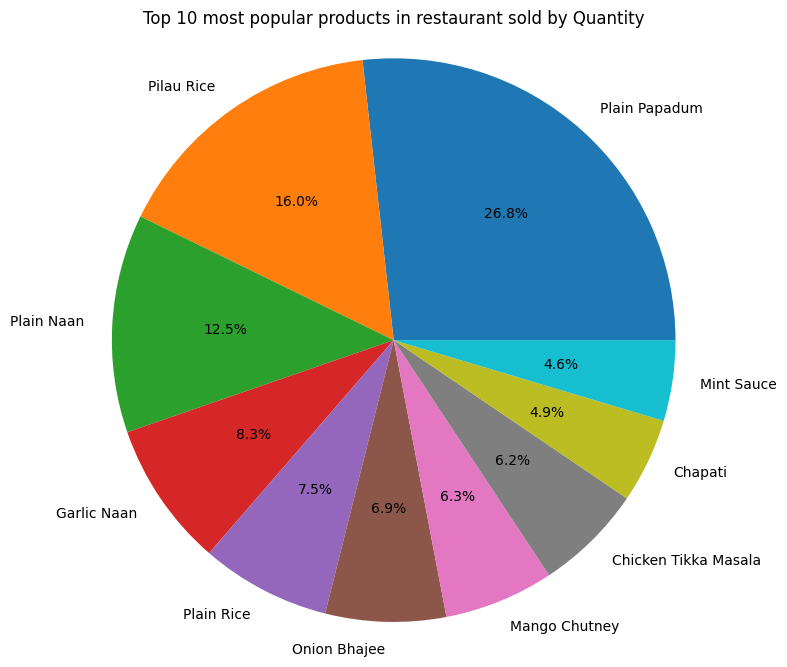

In [61]:
df_groped_by_name = df.groupby("name")["quantity"].sum().reset_index()
top_10 = df_groped_by_name.nlargest(10, "quantity")
top_10["percentage"] = (top_10["quantity"] / top_10["quantity"].sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(
    top_10["percentage"],
    labels=top_10["name"],
    autopct="%1.1f%%"
)
plt.title("Top 10 most popular products in restaurant sold by Quantity")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

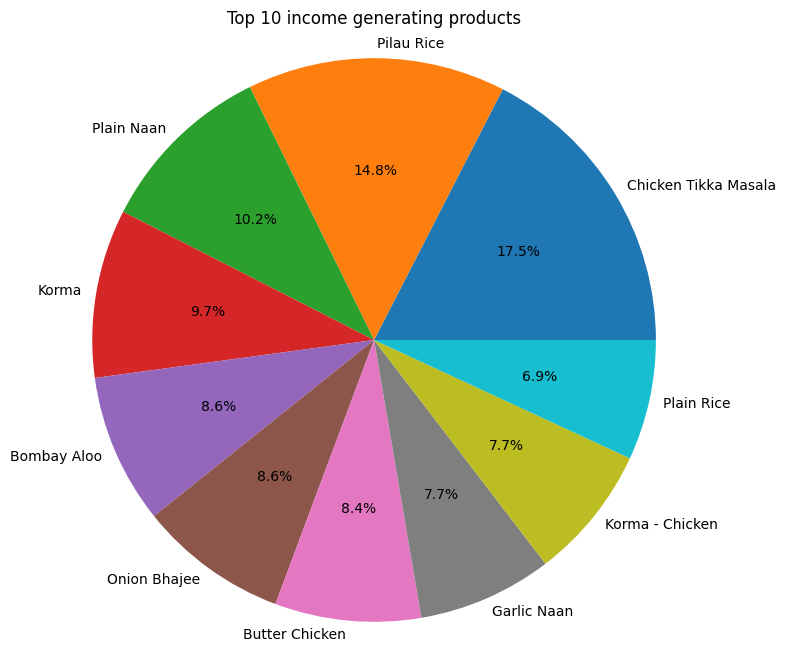

In [74]:
df["order sum"] = df["price"] * df["quantity"]
df_groped_by_name = df.groupby("name")["order sum"].sum().reset_index()
top_10 = df_groped_by_name.nlargest(10, "order sum")

plt.figure(figsize=(8, 8))
plt.pie(
    top_10["order sum"],
    labels=top_10["name"],
    labeldistance=1.05,
    autopct="%1.1f%%"
)
plt.title("Top 10 income generating products")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

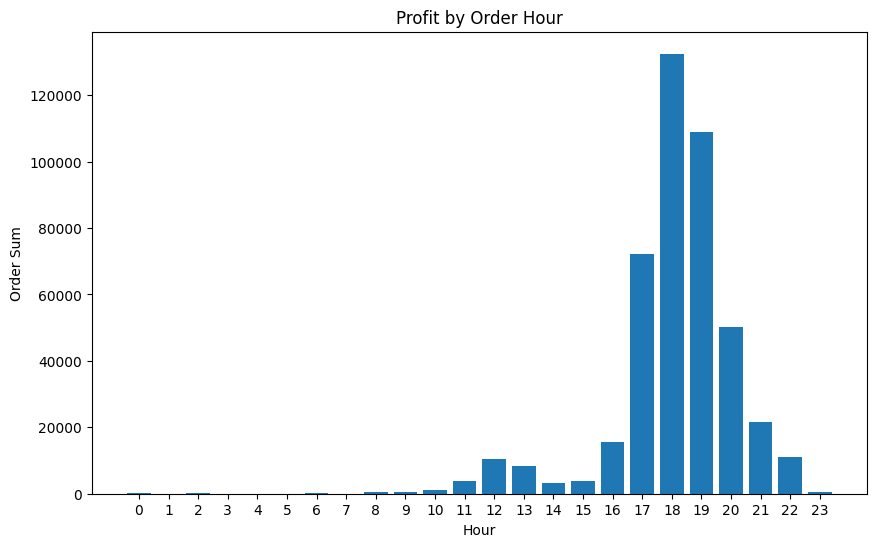

In [82]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df_groped_by_hour = df.groupby("hour")["order sum"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_groped_by_hour["hour"], df_groped_by_hour["order sum"])
plt.xlabel("Hour")
plt.ylabel("Order Sum")
plt.title("Profit by Order Hour")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

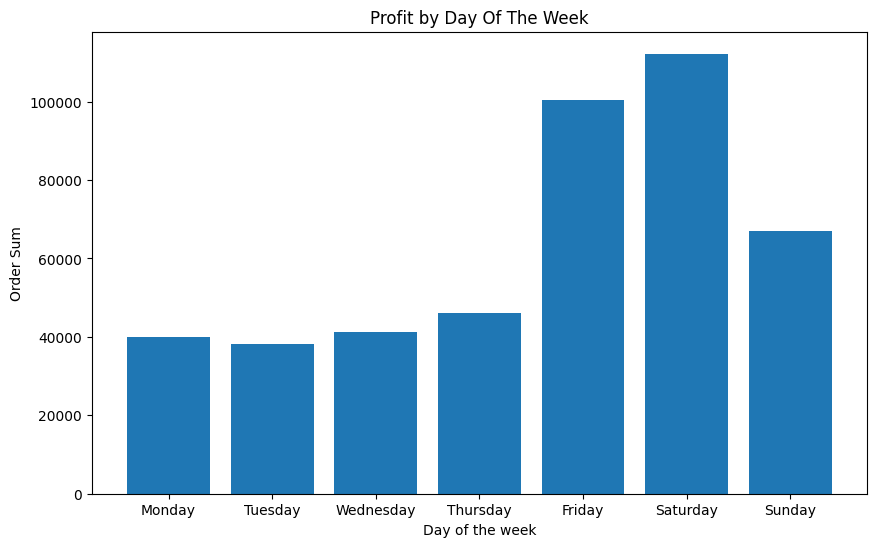

In [118]:
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df["weekday"] = df["datetime"].dt.day_name()
df_groped_by_week = df.groupby("weekday")["order sum"].sum().reset_index()
df_groped_by_week_sorted = df_groped_by_week.sort_values(
    "weekday",
    key=lambda x: x.apply(lambda y: week_days.index(y))
)

plt.figure(figsize=(10, 6))
plt.bar(df_groped_by_week_sorted["weekday"], df_groped_by_week_sorted["order sum"])
plt.xlabel("Day of the week")
plt.ylabel("Order Sum")
plt.title("Profit by Day Of The Week")
plt.show()